![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

# Baseball Analytics

By Alex Lamoureux and Michael Lamoureux 

Welcome to a Jupyter notebook on baseball analytics. This notebook is a free resource and is part of the Callysto project, which brings data science skills to grades 5 to 12 classrooms. 

In this notebook, we’ll start by looking at some baseball statistical data. We will then make some evaluations of the quality of players based on statistical measures.

In real major league baseball, computing statistic are key to understanding how players are valued by their team. The money Moneyball, with Brad Pitt and Jonah Hill is all about baseball analytics. 

Visualizations are coded using Python, a computer programming language. Python contains words from English and is used by data scientists. Programming languages are how people communicate with computers.

“Run” the cells to see the graphs.
Click “Cell” and select “Run All.” This will import the data and run all the code to create the data visualizations (scroll back to the top after you’ve run the cells).   

![instructions](https://github.com/callysto/data-viz-of-the-week/blob/main/images/instructions.png?raw=true)

In [1]:
# import Python libraries

import pandas as pd
import plotly.express as px

## Example: Home run data for Major League Baseball

Data source: https://stathead.com/baseball/

The data source for this dataset is StatHead. The site contains data for all sorts of profession sports. In this notebook, we concentrate on professional baseball data from 2023. It contains a great deal of information about hundreds of players and their performance over the course of the year. This data is not anonymized so we can make evaluations about individual players based on their record. Professional sports data can also be valuable because it helps teams gain a competitive advantage.

We can use Python code to link to the dataset, which is was downloaded from the Internet, and saved locally as a CSV file, a type of spreadsheet. The dataset is large with 766 rows and 34 columns. That’s over 26,000 data points!

Let’s take a look at the columns: Data is displayed for each player, giving their name (Player), home run count (HR), Age, Team, League (Lg) and so on. 

There are 34 columns which can't fit on this display. In the next cell, we can show all the columns names. 

In [33]:
dfb = pd.read_csv("homersfull.csv")
dfb

,Rk,Player,HR,Season,Age,Team,Lg,G,PA,AB,...,OPS,OPS+,TB,GIDP,HBP,SH,SF,IBB,Pos,Player-additional
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9999
1,1.0,Matt Olson,54.0,2023.0,29.0,ATL,NL,162.0,720.0,608.0,...,0.993,162.0,367.0,13.0,4.0,0.0,4.0,8.0,*3,olsonma02
2,2.0,Kyle Schwarber,47.0,2023.0,30.0,PHI,NL,160.0,720.0,585.0,...,0.817,122.0,277.0,4.0,6.0,0.0,3.0,5.0,7D,schwaky01
3,3.0,Pete Alonso,46.0,2023.0,28.0,NYM,NL,154.0,658.0,568.0,...,0.821,122.0,286.0,17.0,21.0,0.0,4.0,6.0,*3/D,alonspe01
4,4.0,Shohei Ohtani,44.0,2023.0,28.0,LAA,AL,135.0,599.0,497.0,...,1.066,184.0,325.0,9.0,3.0,0.0,3.0,21.0,*D1,ohtansh01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,761.0,Alika Williams,0.0,2023.0,24.0,PIT,NL,46.0,112.0,101.0,...,0.518,44.0,25.0,2.0,1.0,1.0,0.0,0.0,6/H,willial04
762,762.0,Nick Wittgren,0.0,2023.0,32.0,KCR,AL,1.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,wittgni01
763,763.0,Ryan Yarbrough,0.0,2023.0,31.0,KCRLAD,ALNL,1.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,yarbrry01
764,764.0,Alex Young,0.0,2023.0,29.0,CIN,NL,2.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,youngal01


### Column names

THe following command will list all 34 column titles in the data base. 

We will be interested in **HR** home runs, **BA** batting average, **OPS** on-base plus slugging, and a few other items.

In [34]:
dfb.columns

Index(['Rk', 'Player', 'HR', 'Season', 'Age', 'Team', 'Lg', 'G', 'PA', 'AB',
       'R', 'H', '1B', '2B', '3B', 'HR.1', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA',
       'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GIDP', 'HBP', 'SH', 'SF', 'IBB',
       'Pos', 'Player-additional'],
      dtype='object')

Baseball is a complex game and there are a lot of information collected in each game. Here is a list of the abbreviations of the column names, which records all this data:

- Player: Name of Player
- HR: Number of Home Runs
- G: Number of Games
- PA: Number of Plate Appearances
- AB:  Number Aof t-Bats (Plate appearances minus walks and sacrifices)
- R: Runs
- H: Hits
- 1B: Singles
- 2B: Doubles
- 3B: Triple
- HR.1: Home runs
- RBI: Runs Batted In
- SB: Stolen Base
- CS: Caught Stealing
- BB: Base on Balls
- SO: Strikeout
- BA: Batting Average
- OBP: On Base Percentage
- SLG: Slugging Average
- OPS: On Base Plus Slugging
- OPS+: is the player's OPS divided by the league average for that player's home stadium, times 100.
- TB: Total Bases
- GIDP: Grounded Into Double Play
- HBP: Hit By Pitch
- SH: Sacrifice Hits (bunts)
- SF: Sacrifice Flies
- IBB: Intentional Base on Balls

## Plotting

Now, let’s plot some basic information. We start with a bar chart showing the top players, with their home run count, and indicate their team. 

This can be done in one line of code using **plotly** to create the chart. 

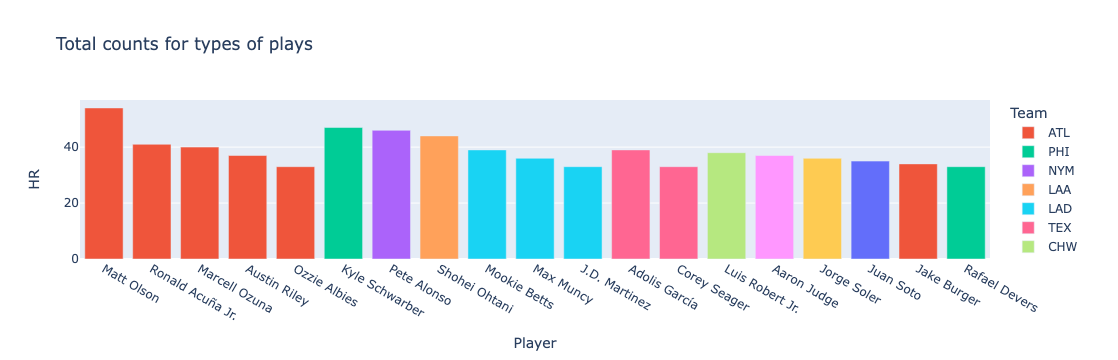

In [15]:
px.bar(dfb[0:20], x='Player', y='HR', color="Team", title='Total counts for types of plays')

### Observations

What do you notice in this bar cheat? WHo is the top home run hitter? What team has the most top hitters?

## Plotting data points

Let's see how the home run production is predicted by the players batting average.

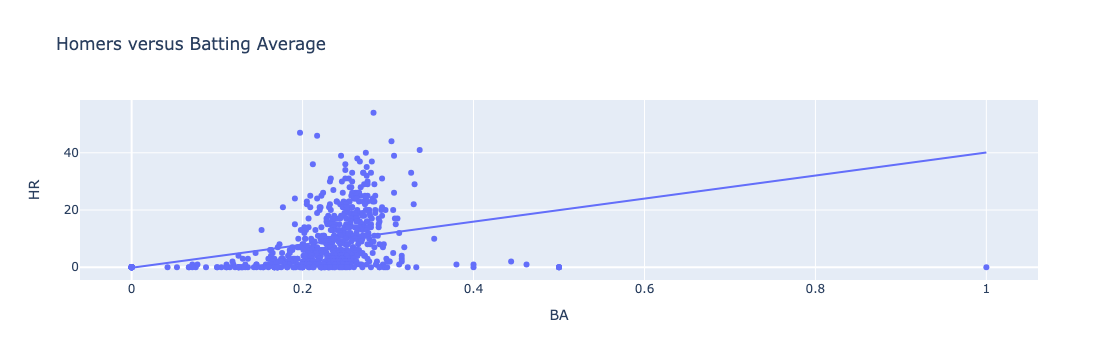

In [17]:
px.scatter(dfb, x='BA', y='HR', title='Homers versus Batting Average',trendline="ols")

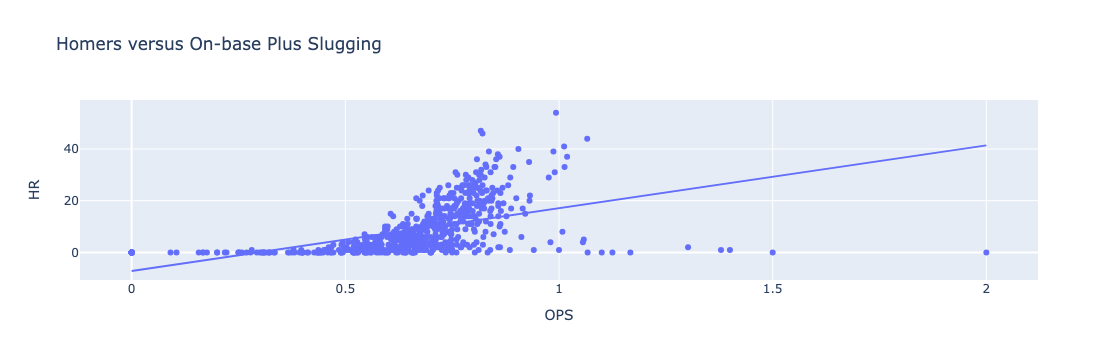

In [18]:
px.scatter(dfb, x='OPS', y='HR', title='Homers versus On-base Plus Slugging',trendline="ols")

## Improving the predictions

We notice on the far right, there are very few data points. These seem to come from players who actually did not play many games. 

So let's improve our data by removing players who have few Plate Apperances (PA).

In [35]:
dfc=dfb.loc[dfb["PA"] > 500]
dfc

,Rk,Player,HR,Season,Age,Team,Lg,G,PA,AB,...,OPS,OPS+,TB,GIDP,HBP,SH,SF,IBB,Pos,Player-additional
1,1.0,Matt Olson,54.0,2023.0,29.0,ATL,NL,162.0,720.0,608.0,...,0.993,162.0,367.0,13.0,4.0,0.0,4.0,8.0,*3,olsonma02
2,2.0,Kyle Schwarber,47.0,2023.0,30.0,PHI,NL,160.0,720.0,585.0,...,0.817,122.0,277.0,4.0,6.0,0.0,3.0,5.0,7D,schwaky01
3,3.0,Pete Alonso,46.0,2023.0,28.0,NYM,NL,154.0,658.0,568.0,...,0.821,122.0,286.0,17.0,21.0,0.0,4.0,6.0,*3/D,alonspe01
4,4.0,Shohei Ohtani,44.0,2023.0,28.0,LAA,AL,135.0,599.0,497.0,...,1.066,184.0,325.0,9.0,3.0,0.0,3.0,21.0,*D1,ohtansh01
5,5.0,Ronald Acuña Jr.,41.0,2023.0,25.0,ATL,NL,159.0,735.0,643.0,...,1.012,168.0,383.0,15.0,9.0,0.0,3.0,3.0,*9/D,acunaro01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,327.0,Andrew Benintendi,5.0,2023.0,28.0,CHW,AL,151.0,621.0,562.0,...,0.682,87.0,200.0,12.0,3.0,1.0,3.0,5.0,*7/HD,beninan01
340,340.0,Steven Kwan,5.0,2023.0,25.0,CLE,AL,158.0,718.0,638.0,...,0.710,100.0,236.0,9.0,3.0,1.0,6.0,2.0,*7/DH,kwanst01
365,365.0,Maikel García,4.0,2023.0,23.0,KCR,AL,123.0,515.0,464.0,...,0.681,88.0,166.0,9.0,2.0,1.0,10.0,0.0,56/D4H,garcima01
482,482.0,Tim Anderson,1.0,2023.0,30.0,CHW,AL,123.0,524.0,493.0,...,0.582,60.0,146.0,15.0,3.0,0.0,2.0,0.0,*6/H4,anderti01


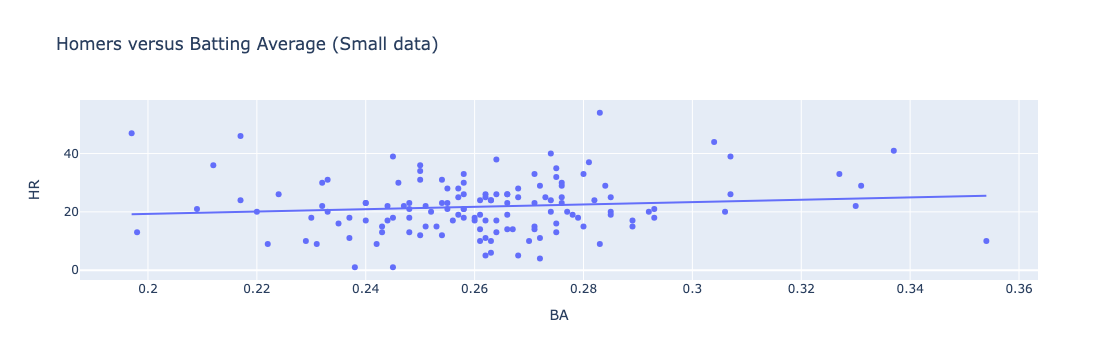

In [24]:
px.scatter(dfc, x='BA', y='HR', title='Homers versus Batting Average (Small data)',trendline="ols")

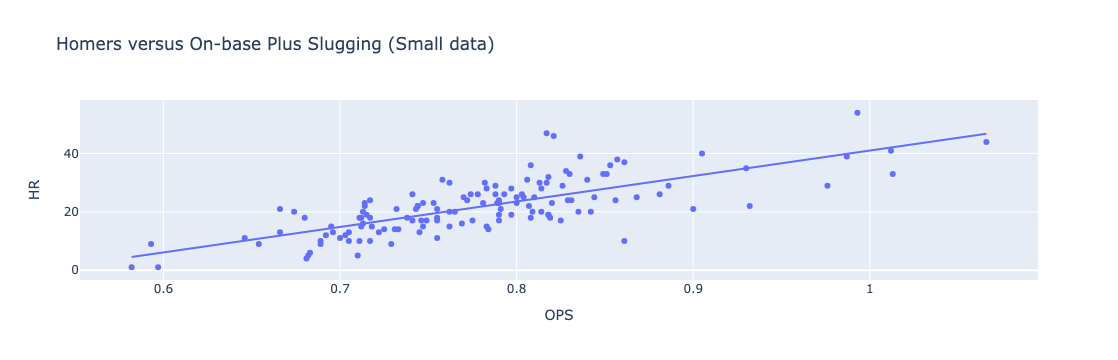

In [23]:
px.scatter(dfc, x='OPS', y='HR', title='Homers versus On-base Plus Slugging (Small data)',trendline="ols")

### Observations

It appears that the HR vs OPS chart shows a much stronger linear correlation that the first chart. You can also use your mouse to roll over the straight line in this second chart and see the $R^2$ value is about 0.5, which indicates a strong correlation.

The first graph has a much smaller $R^2$. What is it? Does this tell you the correlation in the first graph is weaker?


## Adding our own statistical measure

We can create our own statistics to indicate what measures the value of the player. For instance, perhaps we are less interested in home runs but more interested in players that help the team score overall.

For instance, Runs Batted In (RBI) and Runs (R) are good measure of how a player helps the team put points on the score board. We can define a new stat by the formula

$$ \mbox{ result } = \mbox{ RBI } + \mbox{ R } + \mbox{ HR }$$

Notice we have to subtract the Home Run count, since it is already counted in Hits .

Here is the code. We save the results in dfb and then make a new copy of the shorter data frame dfc. 

In [41]:
dfb["result"]=dfb["RBI"] +dfb["R"]-dfb["HR"]
dfc=dfb.loc[dfb["PA"] > 500]
dfc

,Rk,Player,HR,Season,Age,Team,Lg,G,PA,AB,...,OPS+,TB,GIDP,HBP,SH,SF,IBB,Pos,Player-additional,result
1,1.0,Matt Olson,54.0,2023.0,29.0,ATL,NL,162.0,720.0,608.0,...,162.0,367.0,13.0,4.0,0.0,4.0,8.0,*3,olsonma02,212.0
2,2.0,Kyle Schwarber,47.0,2023.0,30.0,PHI,NL,160.0,720.0,585.0,...,122.0,277.0,4.0,6.0,0.0,3.0,5.0,7D,schwaky01,165.0
3,3.0,Pete Alonso,46.0,2023.0,28.0,NYM,NL,154.0,658.0,568.0,...,122.0,286.0,17.0,21.0,0.0,4.0,6.0,*3/D,alonspe01,164.0
4,4.0,Shohei Ohtani,44.0,2023.0,28.0,LAA,AL,135.0,599.0,497.0,...,184.0,325.0,9.0,3.0,0.0,3.0,21.0,*D1,ohtansh01,153.0
5,5.0,Ronald Acuña Jr.,41.0,2023.0,25.0,ATL,NL,159.0,735.0,643.0,...,168.0,383.0,15.0,9.0,0.0,3.0,3.0,*9/D,acunaro01,214.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,327.0,Andrew Benintendi,5.0,2023.0,28.0,CHW,AL,151.0,621.0,562.0,...,87.0,200.0,12.0,3.0,1.0,3.0,5.0,*7/HD,beninan01,112.0
340,340.0,Steven Kwan,5.0,2023.0,25.0,CLE,AL,158.0,718.0,638.0,...,100.0,236.0,9.0,3.0,1.0,6.0,2.0,*7/DH,kwanst01,142.0
365,365.0,Maikel García,4.0,2023.0,23.0,KCR,AL,123.0,515.0,464.0,...,88.0,166.0,9.0,2.0,1.0,10.0,0.0,56/D4H,garcima01,105.0
482,482.0,Tim Anderson,1.0,2023.0,30.0,CHW,AL,123.0,524.0,493.0,...,60.0,146.0,15.0,3.0,0.0,2.0,0.0,*6/H4,anderti01,76.0


## Plotting

Let's plot this **results** data, representing the Runs produced, versus Batting Average and On-base Plus Slugging. 

You can examine the outliers by dragging your mouse over a data point -- it will show the name of the player. 

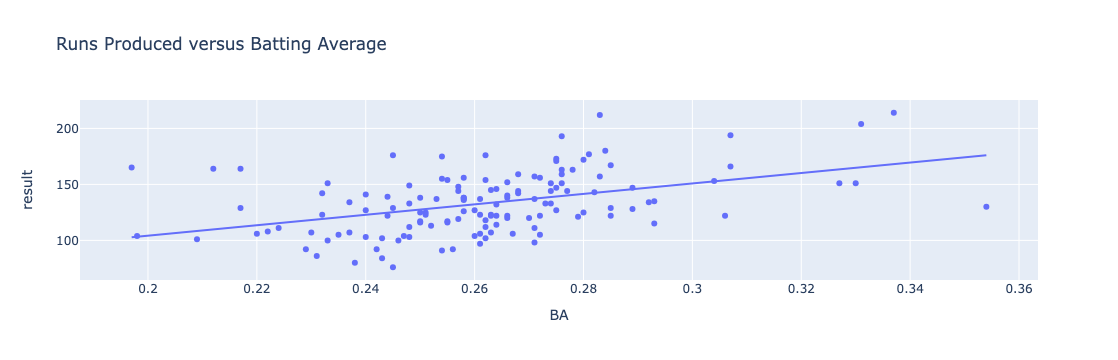

In [46]:
px.scatter(dfc, x='BA', y='result', title='Runs Produced versus Batting Average',trendline="ols",hover_name="Player")

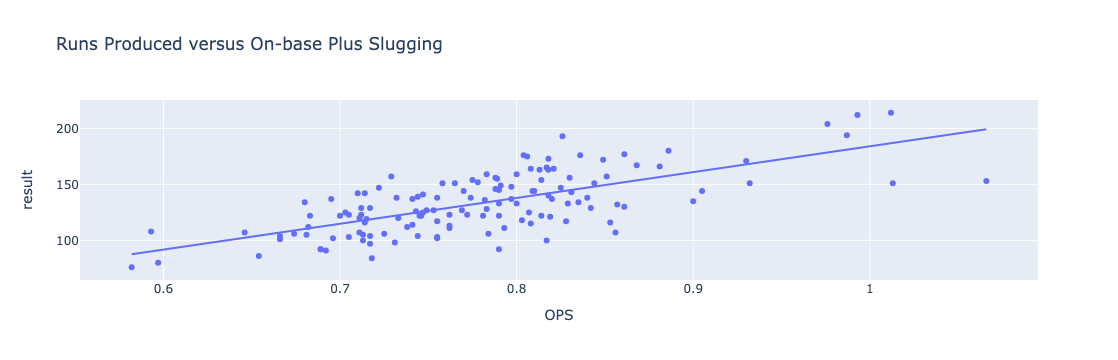

In [47]:
px.scatter(dfc, x='OPS', y='result', title='Runs Produced versus On-base Plus Slugging',trendline="ols",hover_name="Player")

### Observations

Do Batting Average, and OPS serve as a good predictor of the Runs Produced (result)? Which one is better?

Which players are the outliers? Why do you think these player are unusual?


## Going further

What other statistics can you explore, as good predictors of player performance? Here are some possibilities:
- SO: Strike outs
- BA: Batting Average
- OBP: On Base Percentage
- SLG: Slugging Average
- OPS+: On Base Plus Slugging, normalized.

Can you use this kind of data on amateur baseball data? 

For instance, one of us did some multiple regressions with our team's softball statistics. One interesting result is that walk rate is negatively correlated with runs produced, unlike in major league baseball. This is probably because weaker players are trying to draw more walks, while more confident players are swinging early.

What else might you discover?


[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)